In [6]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [84]:
%%bigquery df
SELECT
  sale_id,
  created_at,
  sale_channel
FROM
  `livup-bigdata.core_master.sales`

Construir por dia da semana e por canal a venda


In [83]:
df

,f0_,sale_channel,f1_
0,2018-08-25,e-commerce,117
1,2016-12-24,e-commerce,6
2,2016-12-23,e-commerce,8
3,2019-05-09,station,102
4,2018-08-17,e-commerce,237
...,...,...,...
2236,2017-10-19,e-commerce,117
2237,2016-07-03,e-commerce,3
2238,2019-11-02,station,19
2239,2016-04-29,e-commerce,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660201 entries, 0 to 660200
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   sale_id       660201 non-null  object             
 1   created_at    660201 non-null  datetime64[ns, UTC]
 2   sale_channel  660201 non-null  object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 15.1+ MB


In [11]:
df.sale_channel.unique()

array(['station', 'e-commerce', 'cloud_kitchen'], dtype=object)

In [13]:
df.sale_channel.value_counts(normalize=True)

e-commerce       0.893929
station          0.065688
cloud_kitchen    0.040383
Name: sale_channel, dtype: float64

In [15]:
df.created_at.min()

Timestamp('2016-03-24 03:00:00+0000', tz='UTC')

In [16]:
df.created_at.max()

Timestamp('2020-07-16 16:03:29.315000+0000', tz='UTC')

- eixo x: data
- eixo y: volume
- agrupado por categoria (sale_channel)

In [85]:
df.sample(10)

,sale_id,created_at,sale_channel
521896,5c360d65c91aa700142e67e4,2019-01-09 15:04:05.125000+00:00,e-commerce
462757,5d5bfac730dd9c0015c0a3bf,2019-08-20 13:51:03.080000+00:00,e-commerce
480898,5bab860f04516000132c5805,2018-09-26 13:13:51.632000+00:00,e-commerce
39585,5dc1609d7c12740017e85844,2019-11-05 11:44:29.622000+00:00,station
124327,5debc991f275c30015dbbc6f,2019-12-07 15:47:29.643000+00:00,e-commerce
290269,5d71264d0d76070015d48725,2019-09-05 15:14:21.822000+00:00,e-commerce
9606,5e4d5a0dfed041001799a386,2020-02-19 15:53:49.520000+00:00,station
263657,5d14260601d16a0015c25736,2019-06-27 02:12:22.418000+00:00,e-commerce
145979,5ac6372ed2dccd00147c9545,2018-04-05 14:48:14.234000+00:00,e-commerce
297931,5b5cd2698f11ca001496c84c,2018-07-28 20:30:33.813000+00:00,e-commerce


In [78]:
df.loc[:, 'created_dt'] = df.created_at.apply(lambda x: x.year)

In [79]:
grouped_df = df.groupby(['created_dt', 'sale_channel']).agg({'sale_id': 'count'}).reset_index()

In [80]:
grouped_df.rename(columns={'sale_id': 'n_vendas'}, inplace=True)

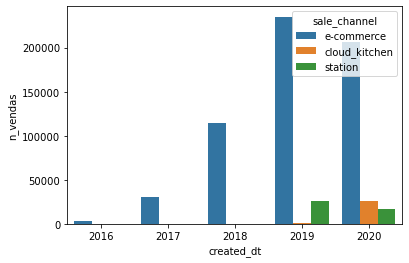

In [81]:
sns.barplot(x="created_dt", y="n_vendas", hue="sale_channel", data=grouped_df)